# Results Analysis
Simple notebook for looking into the results

In [36]:
import pandas as pd

# Manually copied these from the log files:
results = {
    "accuracy": [0.5746951219512195,0.5950203252032520,0.5642276422764227,0.5809959349593496,0.5426829268292683,0.5211382113821138,0.5326219512195122,0.5848577235772358,0.5075203252032521,0.5140243902439025,0.5686991869918699,0.5357723577235772,0.5489837398373983,0.5366869918699188],
    "model": ["BERTje", "Bert","BERTje", "Bert","BERTje", "Bert","BERTje", "Bert","BERTje", "Bert","BERTje", "Bert","BERTje", "Bert"],
    "ds_size": [100, 100, 50, 50, 25, 25, 50, 50, 25, 25, 50, 50, 25, 25],
    "filter_param": ["none", "none", "mqm", "mqm", "mqm", "mqm", "da", "da", "da", "da", "both", "both", "both", "both"]
}

df = pd.DataFrame(results)
df

,accuracy,model,ds_size,filter_param
0,0.574695,BERTje,100,none
1,0.595020,Bert,100,none
2,0.564228,BERTje,50,mqm
3,0.580996,Bert,50,mqm
4,0.542683,BERTje,25,mqm
5,0.521138,Bert,25,mqm
6,0.532622,BERTje,50,da
7,0.584858,Bert,50,da
8,0.507520,BERTje,25,da
9,0.514024,Bert,25,da


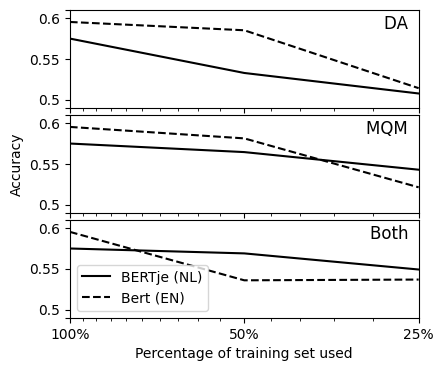

In [37]:
import matplotlib.pyplot as plt

BERTje_filter = df["model"] == "BERTje"
bert_filter = df["model"] == "Bert"

da_filter = (df["filter_param"] == "none") | (df["filter_param"] == "da")
mqm_filter = (df["filter_param"] == "none") | (df["filter_param"] == "mqm")
both_filter = (df["filter_param"] == "none") | (df["filter_param"] == "both")

fig, axs = plt.subplots(nrows=3, sharex=True)

# DA-filtering:
bertje = df[BERTje_filter & da_filter]
bert = df[bert_filter & da_filter]
axs[0].plot(bertje["ds_size"], bertje["accuracy"], color="black")
axs[0].plot(bert["ds_size"], bert["accuracy"], color="black", linestyle="--")
axs[0].set_title('DA  ', y=1.0, pad=-14, loc="right")

# MQM-filtering:
bertje = df[BERTje_filter & mqm_filter]
bert = df[bert_filter & mqm_filter]
axs[1].plot(bertje["ds_size"], bertje["accuracy"], color="black")
axs[1].plot(bert["ds_size"], bert["accuracy"], color="black", linestyle="--")
axs[1].set_title('MQM  ', y=1.0, pad=-14, loc="right")

# BOTH-filtering:
bertje = df[BERTje_filter & both_filter]
bert = df[bert_filter & both_filter]
axs[2].plot(bertje["ds_size"], bertje["accuracy"], color="black")
axs[2].plot(bert["ds_size"], bert["accuracy"], color="black", linestyle="--")
axs[2].set_title('Both  ', y=1.0, pad=-14, loc="right")

# plt.legend()
plt.subplots_adjust(hspace=0.07)
plt.xscale("log")
plt.xlim(100, 25)
# plt.grid(axis="y")
plt.xticks([100, 50, 25], ["100%", "50%", "25%"])
minors = [x for x in range(100, 25, -5)]
plt.xticks(minors, [""] * len(minors), minor=True)
plt.xlabel("Percentage of training set used")
axs[1].set_ylabel("Accuracy")

types =  [  plt.Line2D([0], [0], color='black', linestyle="-"),
                plt.Line2D([0], [0], color='black', linestyle="--")]
axs[2].legend(types, ["BERTje (NL)", "Bert (EN)"], loc="lower left")

for ax in axs:
    ax.set_yticks([0.49, 0.5, 0.55, 0.6, 0.61], ["", "0.5", "0.55", "0.6", ""])

# plt.show()
fig.set_size_inches(4.5, 4)
plt.savefig("bartjebert.png", dpi=300, bbox_inches="tight")

# Now same but mBert experiment:

In [38]:
import pandas as pd

results = {
    "accuracy": [0.5294, 0.5711, 0.4986, 0.5484, 0.5075, 0.5722, 0.4952, 0.5453, 0.5454, 0.5539, 0.5187, 0.4874],
    "model": ["NL", "EN", "NL", "EN", "NL", "EN", "NL", "EN", "NL", "EN", "NL", "EN"],
    "ds_size": [100, 100, 25, 25, 50, 50, 25, 25, 50, 50, 25, 25],
    "filter_param": ["none", "none", "da", "da", "mqm", "mqm", "mqm", "mqm", "both", "both", "both", "both"]
}

df = pd.DataFrame(results)
df

,accuracy,model,ds_size,filter_param
0,0.5294,NL,100,none
1,0.5711,EN,100,none
2,0.4986,NL,25,da
3,0.5484,EN,25,da
4,0.5075,NL,50,mqm
5,0.5722,EN,50,mqm
6,0.4952,NL,25,mqm
7,0.5453,EN,25,mqm
8,0.5454,NL,50,both
9,0.5539,EN,50,both


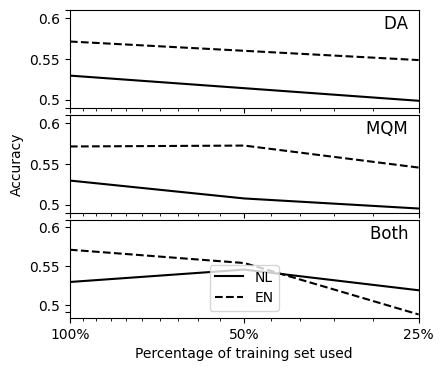

In [39]:
import matplotlib.pyplot as plt

NL_filter = df["model"] == "NL"
EN_filter = df["model"] == "EN"

da_filter = (df["filter_param"] == "none") | (df["filter_param"] == "da")
mqm_filter = (df["filter_param"] == "none") | (df["filter_param"] == "mqm")
both_filter = (df["filter_param"] == "none") | (df["filter_param"] == "both")

fig, axs = plt.subplots(nrows=3, sharex=True)

# DA-filtering:
bertje = df[NL_filter & da_filter]
bert = df[EN_filter & da_filter]
axs[0].plot(bertje["ds_size"], bertje["accuracy"], color="black")
axs[0].plot(bert["ds_size"], bert["accuracy"], color="black", linestyle="--")
axs[0].set_title('DA  ', y=1.0, pad=-14, loc="right")

# MQM-filtering:
bertje = df[NL_filter & mqm_filter]
bert = df[EN_filter & mqm_filter]
axs[1].plot(bertje["ds_size"], bertje["accuracy"], color="black")
axs[1].plot(bert["ds_size"], bert["accuracy"], color="black", linestyle="--")
axs[1].set_title('MQM  ', y=1.0, pad=-14, loc="right")

# BOTH-filtering:
bertje = df[NL_filter & both_filter]
bert = df[EN_filter & both_filter]
axs[2].plot(bertje["ds_size"], bertje["accuracy"], color="black")
axs[2].plot(bert["ds_size"], bert["accuracy"], color="black", linestyle="--")
axs[2].set_title('Both  ', y=1.0, pad=-14, loc="right")

# plt.legend()
plt.subplots_adjust(hspace=0.07)
plt.xscale("log")
plt.xlim(100, 25)
# plt.grid(axis="y")
plt.xticks([100, 50, 25], ["100%", "50%", "25%"])
minors = [x for x in range(100, 25, -5)]
plt.xticks(minors, [""] * len(minors), minor=True)
plt.xlabel("Percentage of training set used")
axs[1].set_ylabel("Accuracy")

types =  [  plt.Line2D([0], [0], color='black', linestyle="-"),
                plt.Line2D([0], [0], color='black', linestyle="--")]
axs[2].legend(types, ["NL", "EN"], loc="lower center")

for ax in axs:
    ax.set_yticks([0.49, 0.5, 0.55, 0.6, 0.61], ["", "0.5", "0.55", "0.6", ""])

# plt.show()
fig.set_size_inches(4.5, 4)
plt.savefig("mberts.png", dpi=300, bbox_inches="tight")